# Breast Cancer

## 1. Data Preprocessing 

### A) Preparation

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, stats , boxcox, skew
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
dataset= pd.read_csv(r"e:\Courses\DEPI Data science\Tech\Datasets\Breast Cancer.csv")

In [85]:
dataset

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [86]:
dataset=dataset.drop(columns=["Unnamed: 32",'id'])

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [88]:
# Identify categorical & Numerical columns
categorical_cols = dataset.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
# Drop unwanted columns
categorical_cols = [col for col in categorical_cols]

# Print unique values for each categorical column
for col in categorical_cols:
    print(f"Column: {col}")
    print(dataset[col].unique())  # Get unique values
    print("-" * 50)  # Separator for readability


Column: diagnosis
['M' 'B']
--------------------------------------------------



###  Variables Describtion:

####   a. Mean Values (Columns 1–10) :
These are the mean values of various measurements for each cell nucleus:
-   `radius_mean`  : Mean distance from the center to points on the perimeter.
-   `texture_mean`  : Standard deviation of gray-scale values.
-   `perimeter_mean`  : Perimeter of the cell nucleus.
-   `area_mean`  : Area of the cell nucleus.
-   `smoothness_mean`  : Local variation in radius lengths.
-   `compactness_mean`  : Perimeter² / area - 1.0.
-   `concavity_mean`  : Severity of concave portions of the contour.
-   `concave points_mean`  : Number of concave portions of the contour.
-   `symmetry_mean`  : Symmetry of the cell nucleus.
-   `fractal_dimension_mean`  : "Coastline approximation" - higher values indicate more complex shapes.

####   b. Standard Error (Columns 11–20)  :
These are the standard errors of the measurements:
-   `radius_se`  : Standard error of the radius.
-   `texture_se`  : Standard error of the texture.
-   `perimeter_se`  : Standard error of the perimeter.
-   `area_se`  : Standard error of the area.
-   `smoothness_se`  : Standard error of the smoothness.
-   `compactness_se`  : Standard error of the compactness.
-   `concavity_se`  : Standard error of the concavity.
-   `concave points_se`  : Standard error of the concave points.
-   `symmetry_se`  : Standard error of the symmetry.
-   `fractal_dimension_se`  : Standard error of the fractal dimension.

####   c. Worst Values (Columns 21–30)  :
These are the largest (worst) values of the measurements:
-   `radius_worst`  : Worst (largest) radius.
-   `texture_worst`  : Worst texture.
-   `perimeter_worst`  : Worst perimeter.
-   `area_worst`  : Worst area.
-   `smoothness_worst`  : Worst smoothness.
-   `compactness_worst`  : Worst compactness.
-   `concavity_worst`  : Worst concavity.
-   `concave points_worst`  : Worst concave points.
-   `symmetry_worst`  : Worst symmetry.
-   `fractal_dimension_worst`  : Worst fractal dimension.



In [89]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [90]:
sum(dataset.duplicated())  

0

In [91]:
(dataset.select_dtypes(include=['number']) < 0).sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [92]:
dataset.columns = dataset.columns.str.strip()                                 # Remove extra spaces in column names
dataset = dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Remove spaces in values


In [93]:
dataset.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

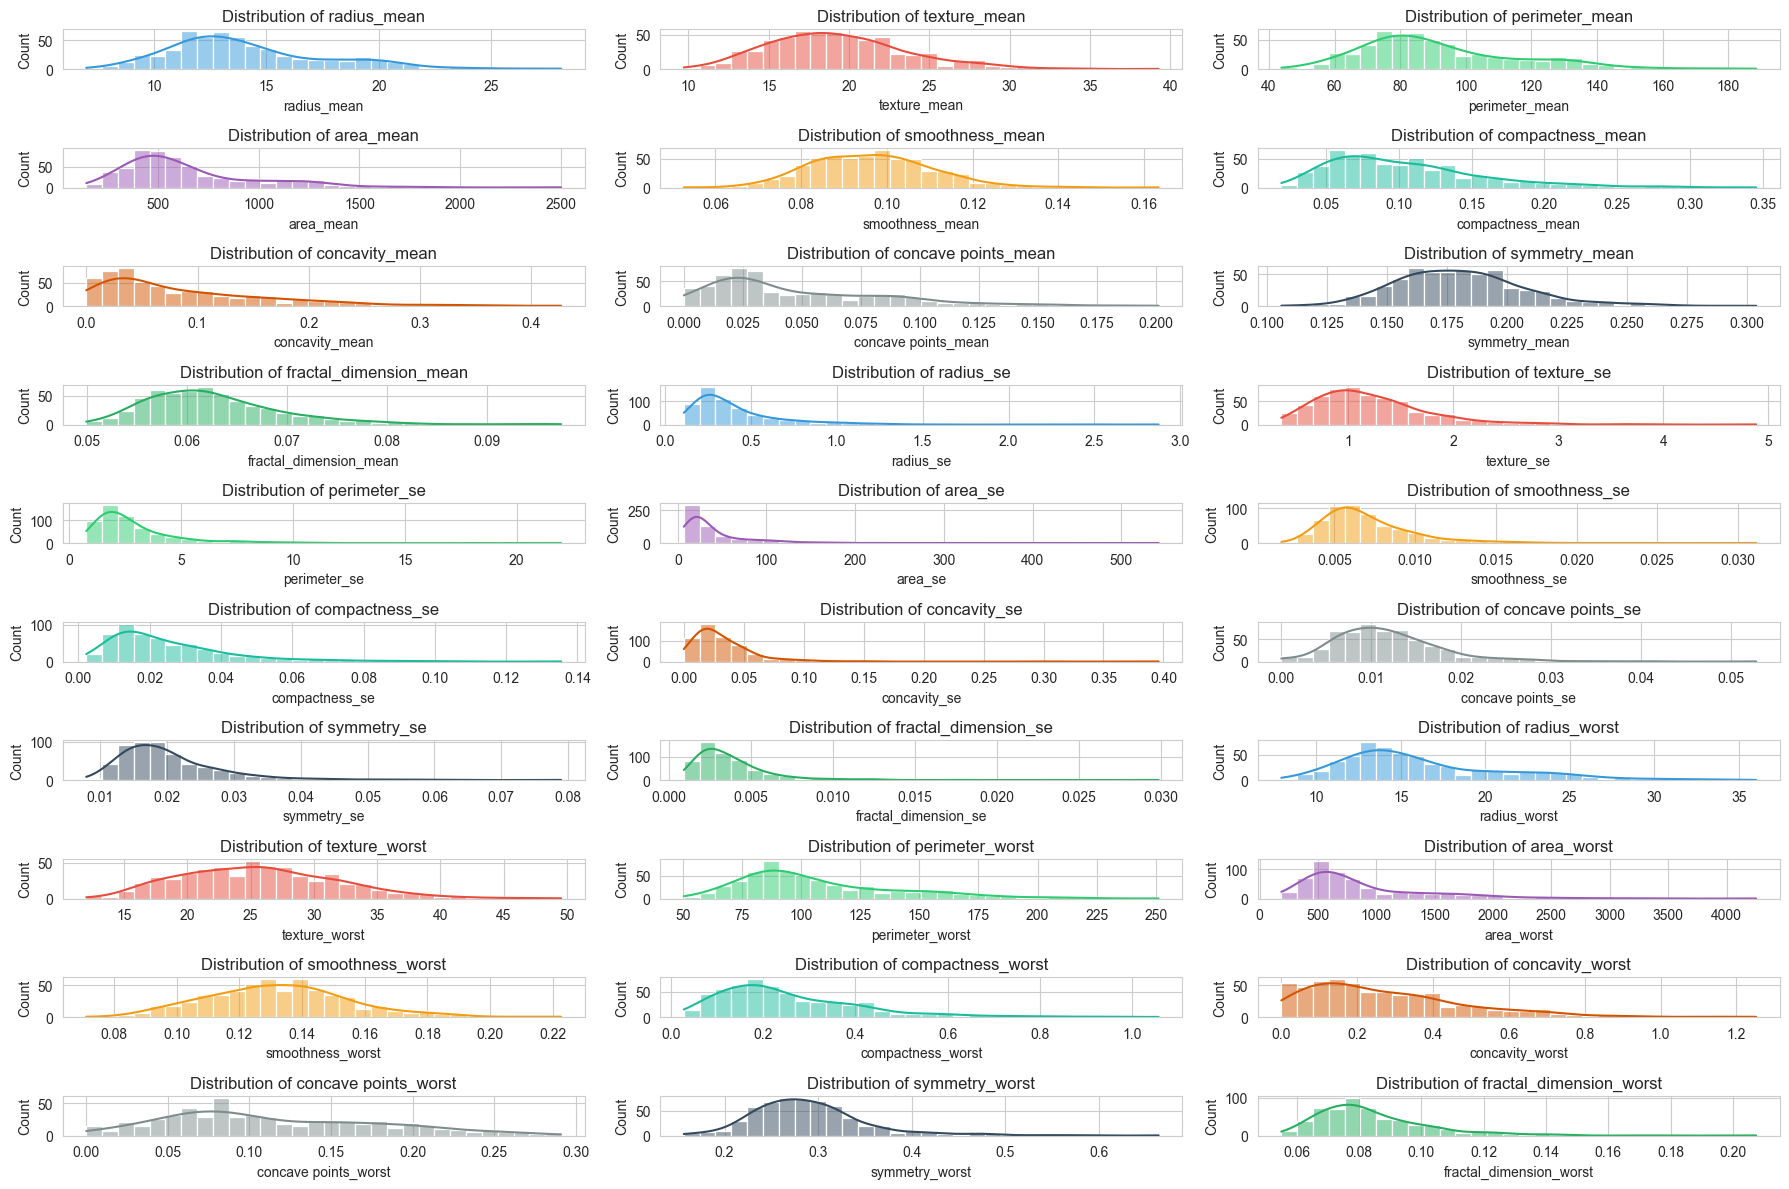

In [94]:
# Visualize Numerical Features
colors = ["#3498db", "#e74c3c", "#2ecc71", "#9b59b6", "#f39c12", "#1abc9c", "#d35400", "#7f8c8d", "#34495e", "#27ae60"]
num_features = len(num_cols)
rows = (num_features // 3) + (num_features % 3 > 0)  # Adjust rows dynamically
fig, axes = plt.subplots(rows, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten axes array

for i, col in enumerate(num_cols):
    sns.histplot(dataset[col], bins=30, kde=True, ax=axes[i], color=colors[i % len(colors)])  
    axes[i].set_title(f"Distribution of {col}")
for j in range(i + 1, len(axes)): # Hide unused subplots if num_features is not a multiple of 3
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()



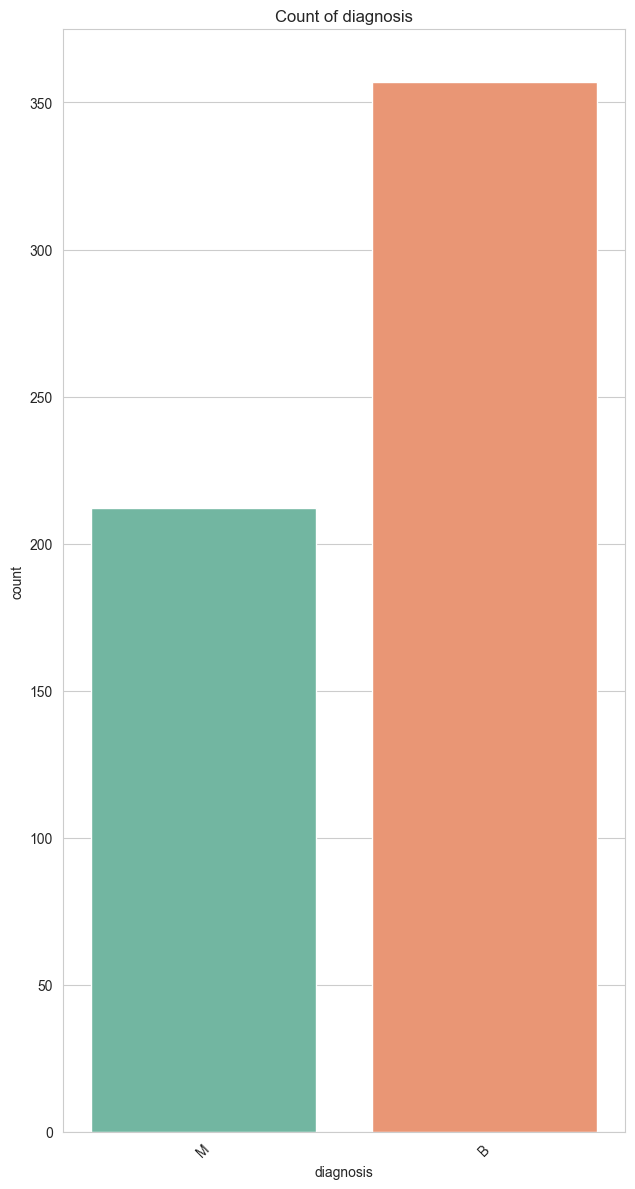

In [95]:
# Visualize Categorical Features
cat_features = len(categorical_cols)
rows = (cat_features // 3) + (cat_features % 3 > 0)  # Adjust rows dynamically
fig, axes = plt.subplots(rows, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten axes array

for i, col in enumerate(categorical_cols):
    palette = sns.color_palette("Set2", n_colors=len(dataset[col].unique()))  # Dynamic palette size
    sns.countplot(x=dataset[col], ax=axes[i], hue=dataset[col], palette=palette, legend=False)  
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Hide unused subplots if cat_features is not a multiple of 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()




## 2. Feature Engineering

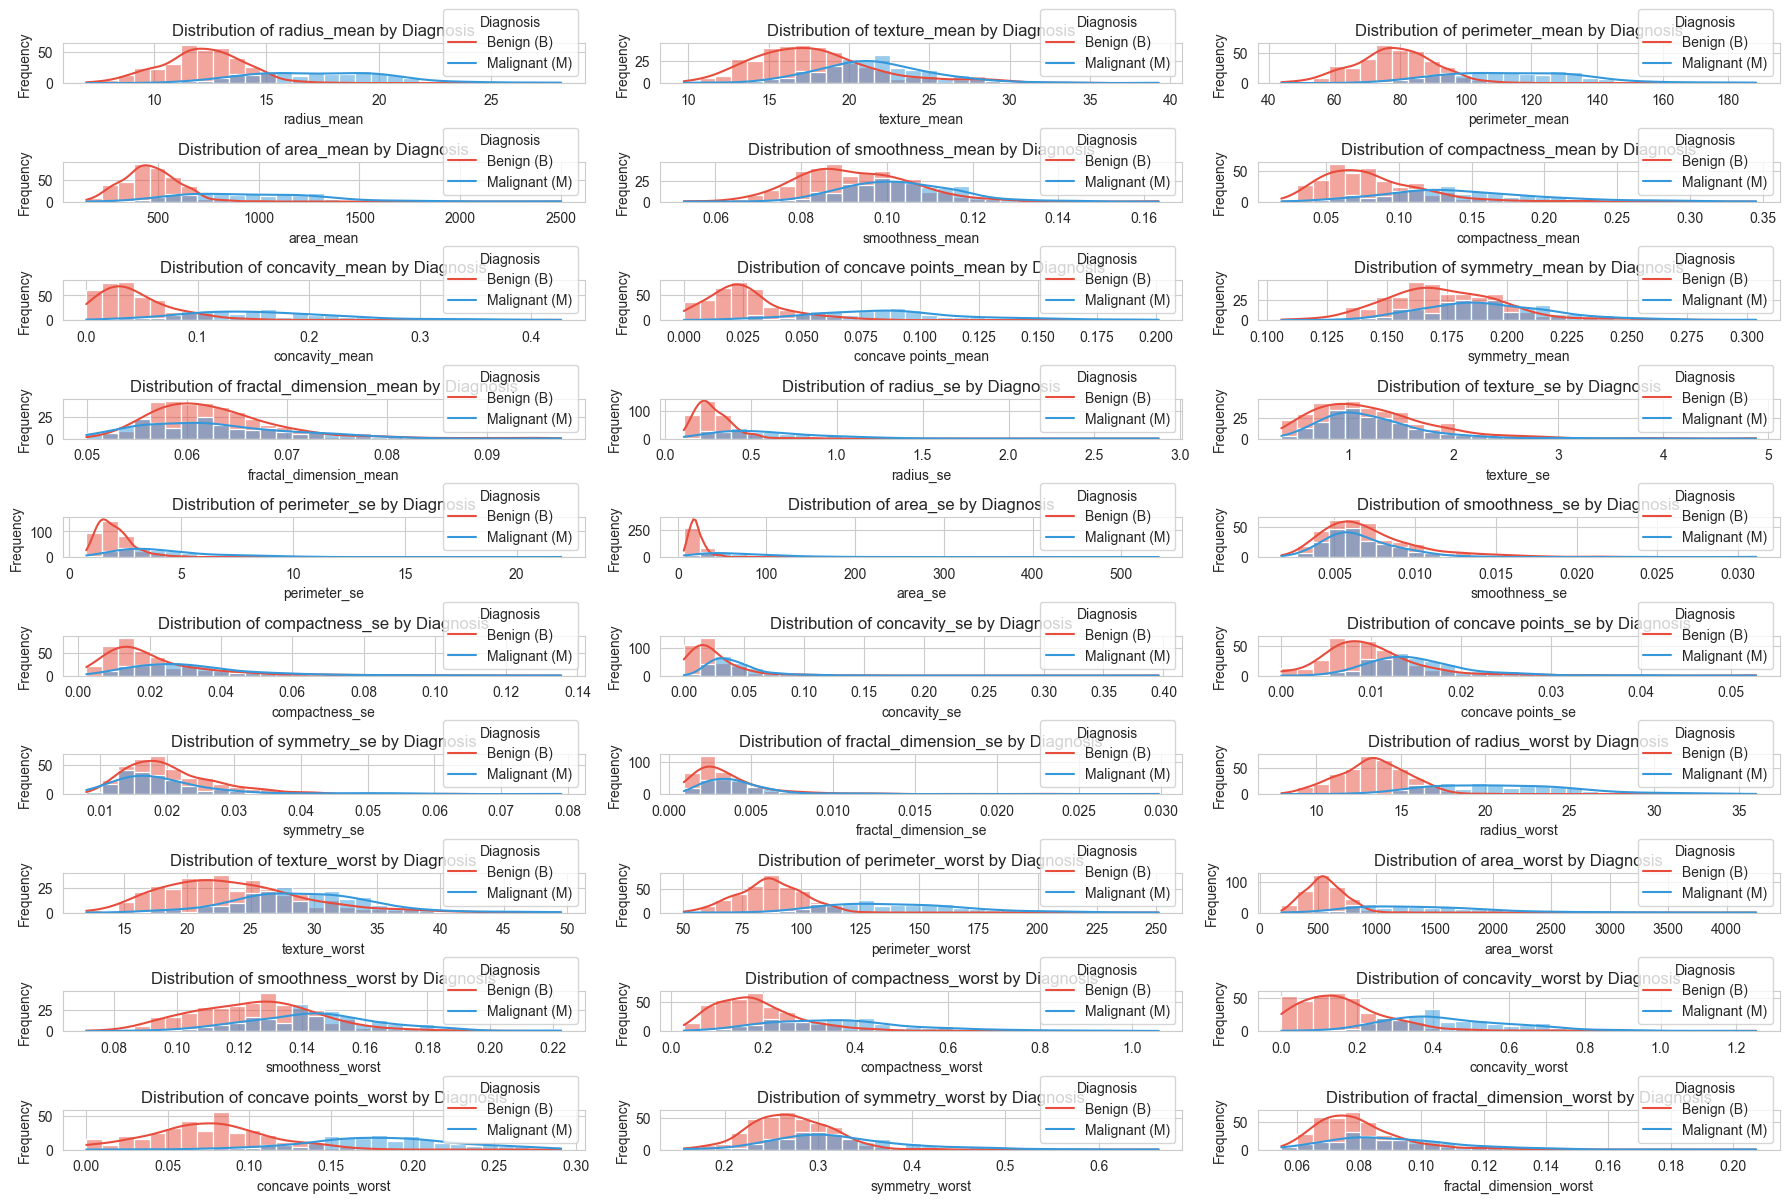

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors for visualization
colors = ["#3498db", "#e74c3c"]  # One color for each class (M and B)

# List of numerical columns (excluding the target)
num_cols = dataset.columns[1:]  # Skip the first column (diagnosis)

# Calculate the number of rows needed for subplots
num_features = len(num_cols)
rows = (num_features // 3) + (num_features % 3 > 0)  # Adjust rows dynamically

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten axes array

# Plot each numerical feature with hue for the target variable
for i, col in enumerate(num_cols):
    sns.histplot(data=dataset, x=col, hue='diagnosis', kde=True, ax=axes[i], palette=colors, bins=30)
    axes[i].set_title(f"Distribution of {col} by Diagnosis")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].legend(title='Diagnosis', labels=['Benign (B)', 'Malignant (M)'])

# Hide unused subplots if num_features is not a multiple of 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [97]:
import pandas as pd

# Example: Create ratio features
dataset['area_perimeter_ratio'] = dataset['area_mean'] / dataset['perimeter_mean']
dataset['compactness_smoothness_ratio'] = dataset['compactness_mean'] / dataset['smoothness_mean']

# Example: Create difference features
dataset['radius_worst_mean_diff'] = dataset['radius_worst'] - dataset['radius_mean']
dataset['texture_worst_mean_diff'] = dataset['texture_worst'] - dataset['texture_mean']

# Example: Create aggregated features
dataset['mean_of_means'] = dataset[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']].mean(axis=1)

# Check the new features
print(dataset.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  compactness_worst  concavity_worst  \
0         0.2419  ...             0.6656           0.7119   


## 3. Handling Outliers

### A) Detecting Phase

In [98]:
def print_outliers_iqr(data_set, factor=1.5): # Removes outliers using the IQR method and prints row count before and after removal."""
    
    # Store original shape before removing outliers
    original_shape = data_set.shape[0]
    # Copy dataset to avoid modifying original data
    cleaned_data = data_set.copy()

    for col in num_cols:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Remove outliers for this column
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    # Store new shape after outlier removal
    new_shape = cleaned_data.shape[0]

    # Print before & after outlier removal
    print(f"🔹 Rows before removing outliers: {original_shape}")
    print(f"🔹 Rows after removing outliers: {new_shape}")
    print(f"🔹 Rows removed (outliers detected): {original_shape - new_shape} \n which is {100-int((new_shape/original_shape)*100)} % from dataset")
# Call the function
print_outliers_iqr(dataset)

# Try to separate to get more efficiency in detection


🔹 Rows before removing outliers: 569
🔹 Rows after removing outliers: 277
🔹 Rows removed (outliers detected): 292 
 which is 52 % from dataset


In [99]:
def classify_features_by_skewness(df, threshold=0.5):
    normal_features = []
    skewed_features = []
    for column in df.select_dtypes(include=['number']).columns:  # Loop through numeric features
        skewness = df[column].skew()
        if abs(skewness) < threshold:
            #print(f"✅ {column} is **Normally Distributed**\n")
            normal_features.append(column)
        else:
           # print(f"🚨 {column} is **Skewed**\n")
            skewed_features.append(column)
    
    print(f"✅ Normal Features: {normal_features}")
    print(f"🚨 Skewed Features: {skewed_features}")
    
    return normal_features, skewed_features

# 🔥 Example Usage
normal_features, skewed_features = classify_features_by_skewness(dataset)


✅ Normal Features: ['smoothness_mean', 'texture_worst', 'smoothness_worst', 'concave points_worst']
🚨 Skewed Features: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst', 'area_perimeter_ratio', 'compactness_smoothness_ratio', 'radius_worst_mean_diff', 'texture_worst_mean_diff', 'mean_of_means']


In [100]:
def count_total_outliers(data_set, factor=1.5): # Function to count outliers in the entire dataset using the IQR method
    total_outliers = 0

    for col in skewed_features:
        Q1 = data_set[col].quantile(0.25)
        Q3 = data_set[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        outliers = data_set[(data_set[col] < lower_bound) | (data_set[col] > upper_bound)]
        num_outliers = outliers.shape[0]

        total_outliers += num_outliers
        print(f"Outliers in Column ({col}) = {num_outliers}")

    print("=" * 40)
    print(f"🔹 Total Outliers in Dataset: {total_outliers}")

# Call the function
count_total_outliers(dataset)


Outliers in Column (radius_mean) = 14
Outliers in Column (texture_mean) = 7
Outliers in Column (perimeter_mean) = 13
Outliers in Column (area_mean) = 25
Outliers in Column (compactness_mean) = 16
Outliers in Column (concavity_mean) = 18
Outliers in Column (concave points_mean) = 10
Outliers in Column (symmetry_mean) = 15
Outliers in Column (fractal_dimension_mean) = 15
Outliers in Column (radius_se) = 38
Outliers in Column (texture_se) = 20
Outliers in Column (perimeter_se) = 38
Outliers in Column (area_se) = 65
Outliers in Column (smoothness_se) = 30
Outliers in Column (compactness_se) = 28
Outliers in Column (concavity_se) = 22
Outliers in Column (concave points_se) = 19
Outliers in Column (symmetry_se) = 27
Outliers in Column (fractal_dimension_se) = 28
Outliers in Column (radius_worst) = 17
Outliers in Column (perimeter_worst) = 15
Outliers in Column (area_worst) = 35
Outliers in Column (compactness_worst) = 16
Outliers in Column (concavity_worst) = 12
Outliers in Column (symmetry_

In [101]:
def print_outliers_iqr(data_set, factor=1.5): # Removes outliers using the IQR method and prints row count before and after removal."""
    
    # Store original shape before removing outliers
    original_shape = data_set.shape[0]
    # Copy dataset to avoid modifying original data
    cleaned_data = data_set.copy()

    for col in skewed_features:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Remove outliers for this column
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    # Store new shape after outlier removal
    new_shape = cleaned_data.shape[0]

    # Print before & after outlier removal
    print(f"🔹 Rows before removing outliers: {original_shape}")
    print(f"🔹 Rows after removing outliers: {new_shape}")
    print(f"🔹 Rows removed (outliers detected): {original_shape - new_shape} \n which is {100-int((new_shape/original_shape)*100)} % from dataset")


# Call the function
print_outliers_iqr(dataset)

# ✅ Best For:
# Skewed distributions (e.g., prices, salaries, time intervals).
# Non-Gaussian (non-normal) data.

# Comparing btw prev code O/P (10041) & this code O/P (7360) means that Some rows are outliers in multiple columns and are counted more than once


🔹 Rows before removing outliers: 569
🔹 Rows after removing outliers: 260
🔹 Rows removed (outliers detected): 309 
 which is 55 % from dataset


In [102]:
def print_outliers_zscore(data, threshold=3):

    # Compute Z-scores
    z_scores = np.abs(zscore(data[normal_features]))
    
    # Find rows without outliers (Z-score within ±threshold)
    filtered_data = data[(z_scores < threshold).all(axis=1)]
    
    print(f"🔹 Rows before removing outliers: {data.shape[0]}")
    print(f"🔹 Rows after removing outliers: {filtered_data.shape[0]}")
    print(f"🔹 Rows removed: {data.shape[0] - filtered_data.shape[0]} \n which is {100-int((filtered_data.shape[0]/data.shape[0])*100)} % from dataset")

    

# Example usage:
print_outliers_zscore(dataset)

# ✅ Best For:
# Normally distributed data.
# When the dataset size is large (outliers don’t heavily impact the mean).


🔹 Rows before removing outliers: 569
🔹 Rows after removing outliers: 558
🔹 Rows removed: 11 
 which is 2 % from dataset


### B. Visualization Before Treatment

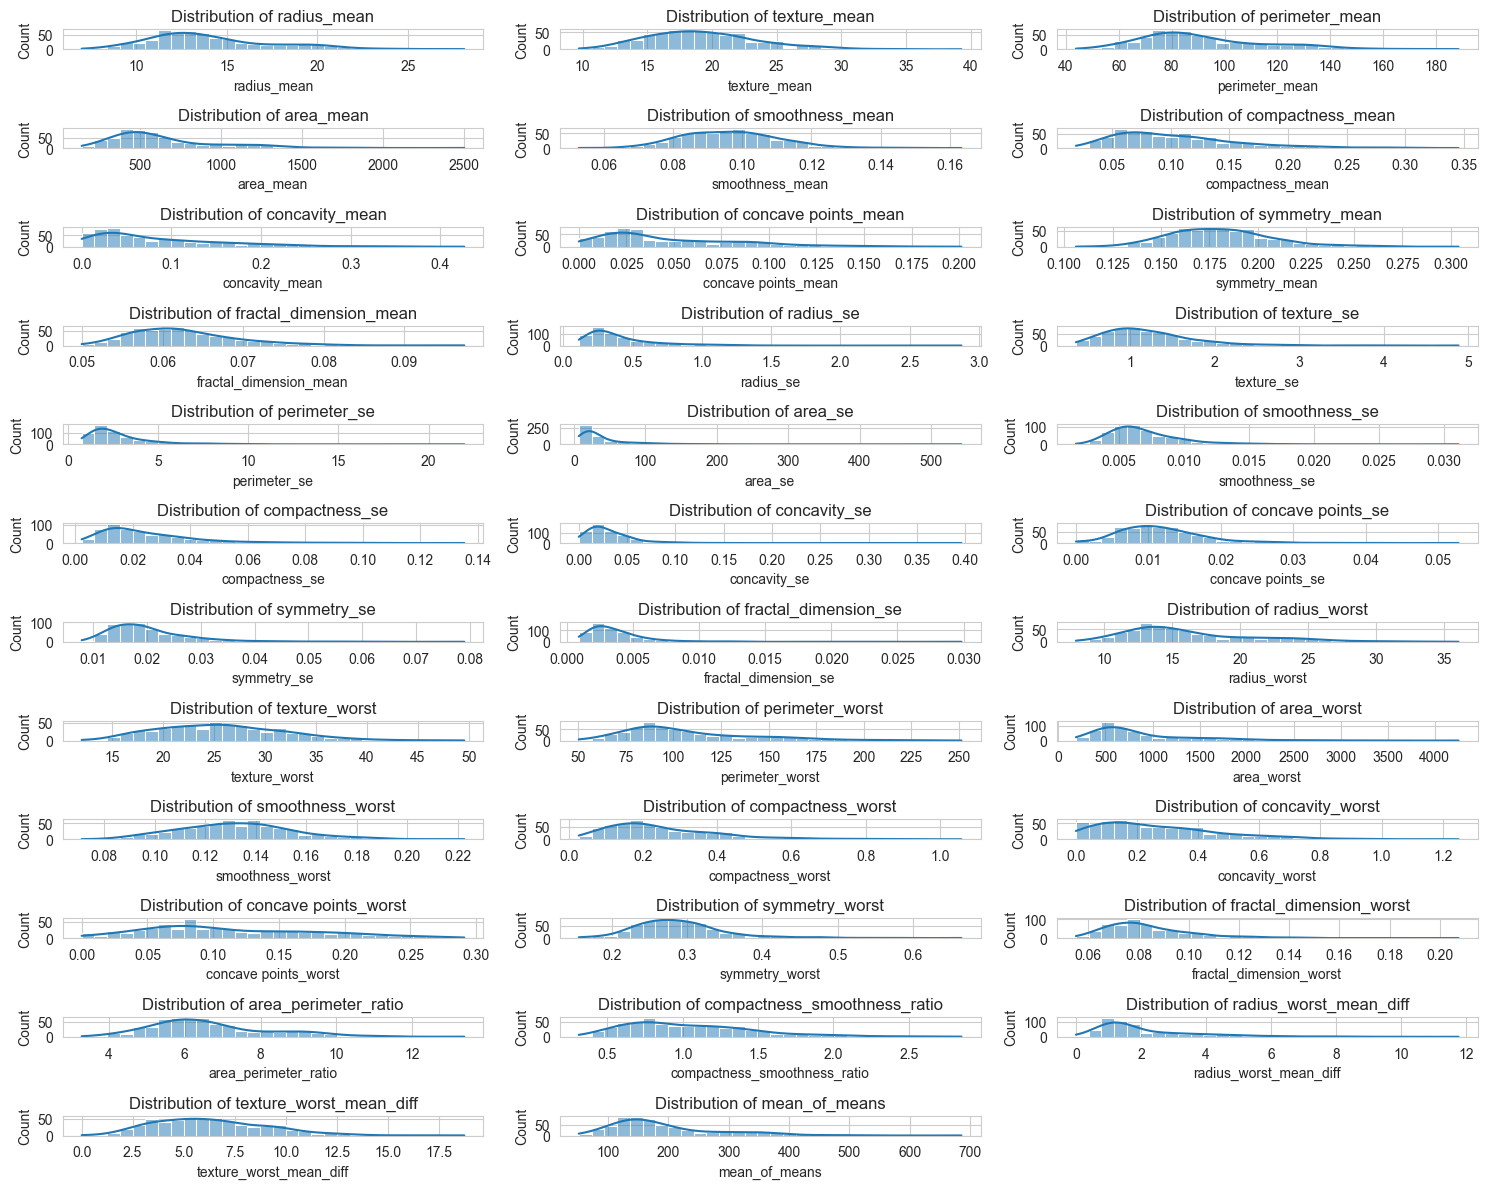

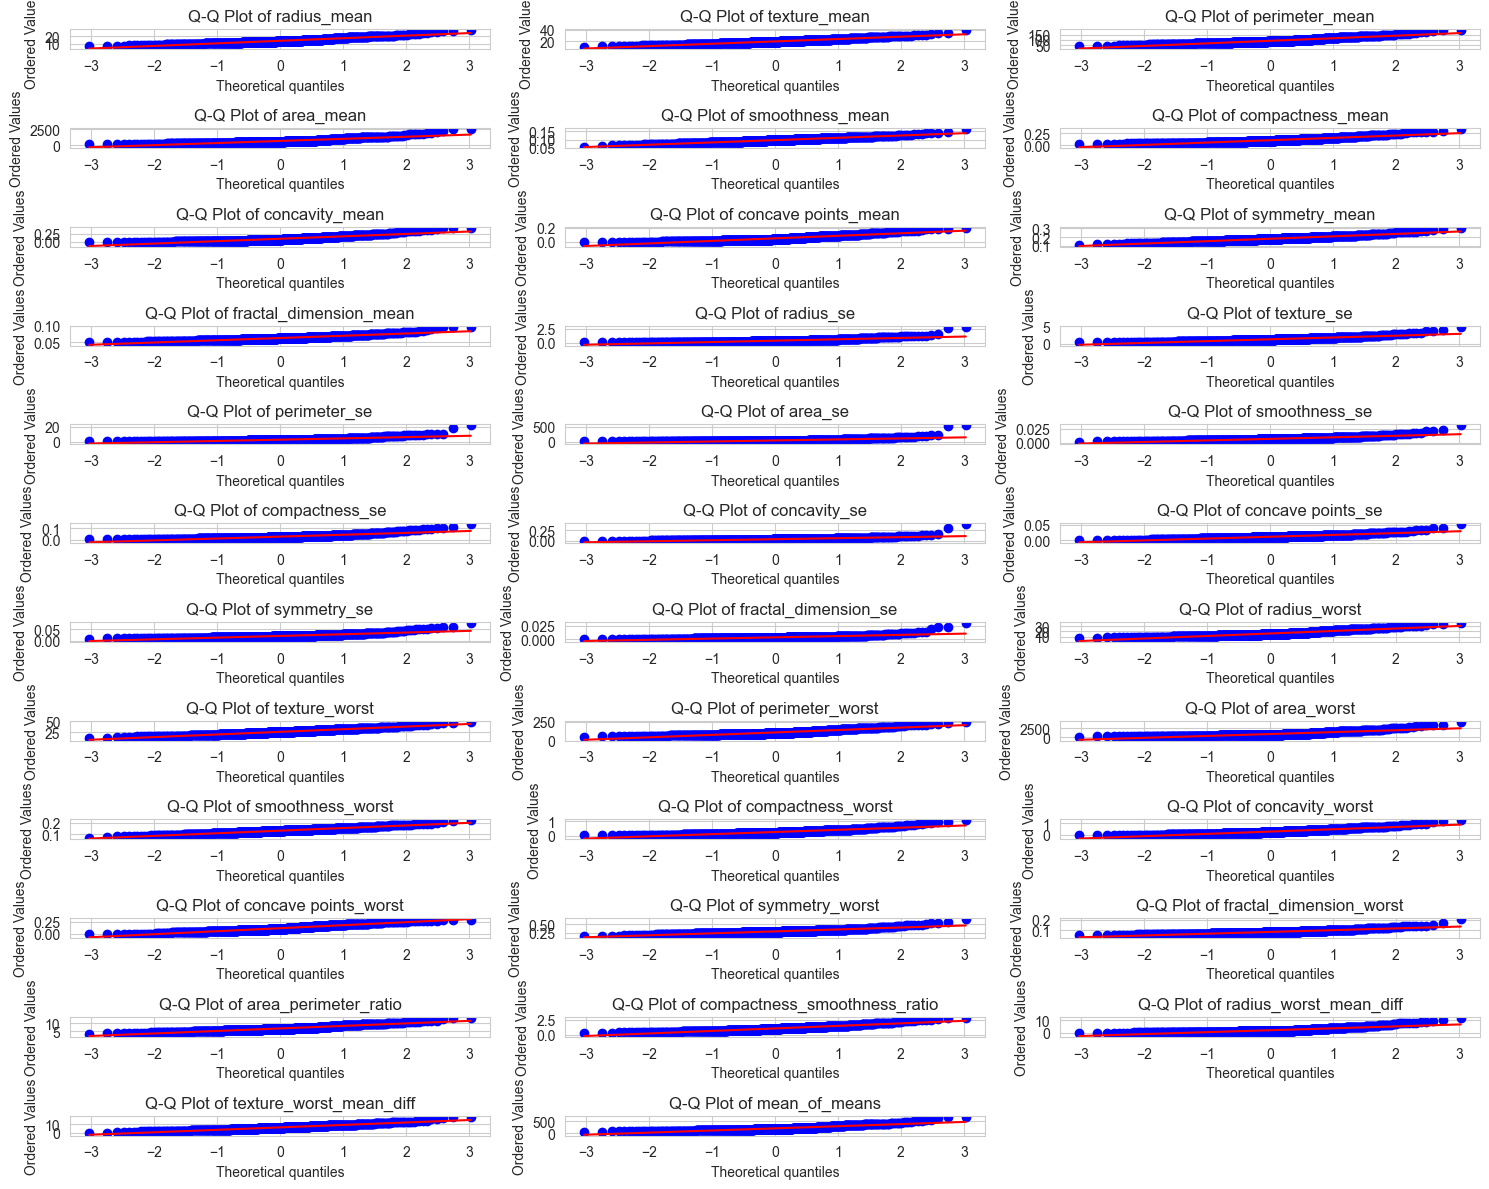

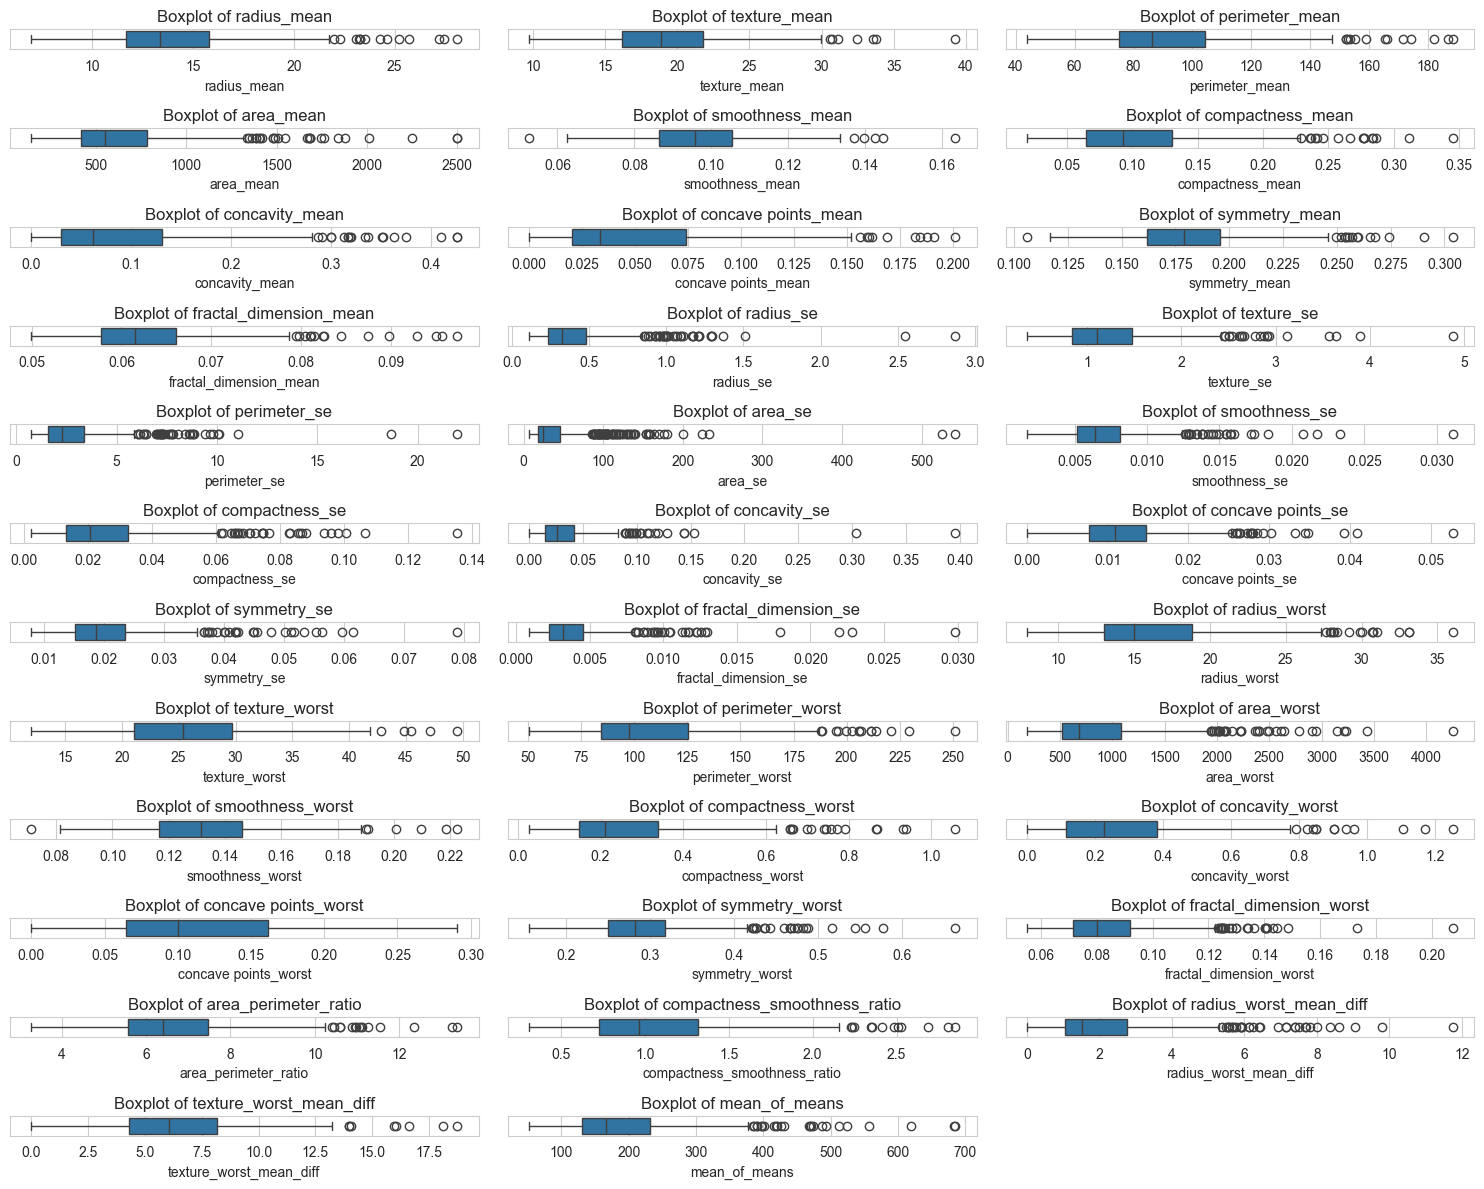

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# List of numerical columns (excluding the target)
num_cols = dataset.columns[1:]  # Skip the first column (diagnosis)

# Function to calculate the number of rows and columns for subplots
def calculate_subplot_layout(num_features, max_cols=3):
    rows = (num_features // max_cols) + (num_features % max_cols > 0)
    return rows, max_cols

# Calculate the number of rows and columns
rows, cols = calculate_subplot_layout(len(num_cols))

# Plot histograms for each numerical feature
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)  # Dynamically adjust subplot layout
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Q-Q Plots to check for normality
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)  # Dynamically adjust subplot layout
    stats.probplot(dataset[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

# Box plots to detect extreme values
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)  # Dynamically adjust subplot layout
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### C. Treatment Phase

In [104]:
dataset_treated= dataset.copy()

In [105]:
# Type of skewness to be treated
def detect_skewness_and_suggest_transformation(data, threshold=0.5):
    skew_info = {}

    # Loop through numerical features
    for col in skewed_features:
        skewness = data[col].skew()

        if abs(skewness) < threshold:
            suggestion = "No transformation needed (approximately normal)"
        elif skewness > 0:
            suggestion = "Right-skewed → Try Log, Square Root, or Box-Cox"
        else:
            suggestion = "Left-skewed → Try Exponential or Box-Cox transformation"

        skew_info[col] = {"Skewness": round(skewness, 3), "Suggestion": suggestion}

    # Convert results to DataFrame for better readability
    skew_df = pd.DataFrame.from_dict(skew_info, orient='index')
    return skew_df

# Example usage
skewness_results = detect_skewness_and_suggest_transformation(dataset_treated)
print(skewness_results)



                              Skewness  \
radius_mean                      0.942   
texture_mean                     0.650   
perimeter_mean                   0.991   
area_mean                        1.646   
compactness_mean                 1.190   
concavity_mean                   1.401   
concave points_mean              1.171   
symmetry_mean                    0.726   
fractal_dimension_mean           1.304   
radius_se                        3.089   
texture_se                       1.646   
perimeter_se                     3.444   
area_se                          5.447   
smoothness_se                    2.314   
compactness_se                   1.902   
concavity_se                     5.110   
concave points_se                1.445   
symmetry_se                      2.195   
fractal_dimension_se             3.924   
radius_worst                     1.103   
perimeter_worst                  1.128   
area_worst                       1.859   
compactness_worst                1

In [106]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox, skew

# Function to apply log transformation
def log_transform(dataset, column):
    dataset[column] = np.log1p(dataset[column])  # Log transformation (handles zero values)
    return dataset


# List of right-skewed features (from the output)
right_skewed_features = [
    "radius_mean", "perimeter_mean", "area_mean", "compactness_mean",
    "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se",
    "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst",
    "perimeter_worst", "area_worst", "compactness_worst", "concavity_worst", "symmetry_worst",
    "fractal_dimension_worst", "area_perimeter_ratio", "compactness_smoothness_ratio",
      "mean_of_means"
]

# Apply transformations to reduce skewness
for feature in right_skewed_features:
    dataset = log_transform(dataset, feature)

# Recalculate skewness after transformation
skewness_after_transformation = dataset[right_skewed_features].skew()

# Print the skewness after transformation
print("🔹 Skewness After Transformation:\n", skewness_after_transformation)

🔹 Skewness After Transformation:
 radius_mean                     0.348744
perimeter_mean                  0.328800
area_mean                       0.287328
compactness_mean                1.043195
concavity_mean                  1.206982
concave points_mean             1.083180
symmetry_mean                   0.632718
fractal_dimension_mean          1.272294
radius_se                       1.713417
texture_se                      0.629526
perimeter_se                    1.025375
area_se                         0.847298
smoothness_se                   2.283394
compactness_se                  1.816278
concavity_se                    4.231738
concave points_se               1.399869
symmetry_se                     2.135874
fractal_dimension_se            3.874373
radius_worst                    0.506347
perimeter_worst                 0.462758
area_worst                      0.457614
compactness_worst               1.048729
concavity_worst                 0.717939
symmetry_worst         

### D. Visualization after treatment

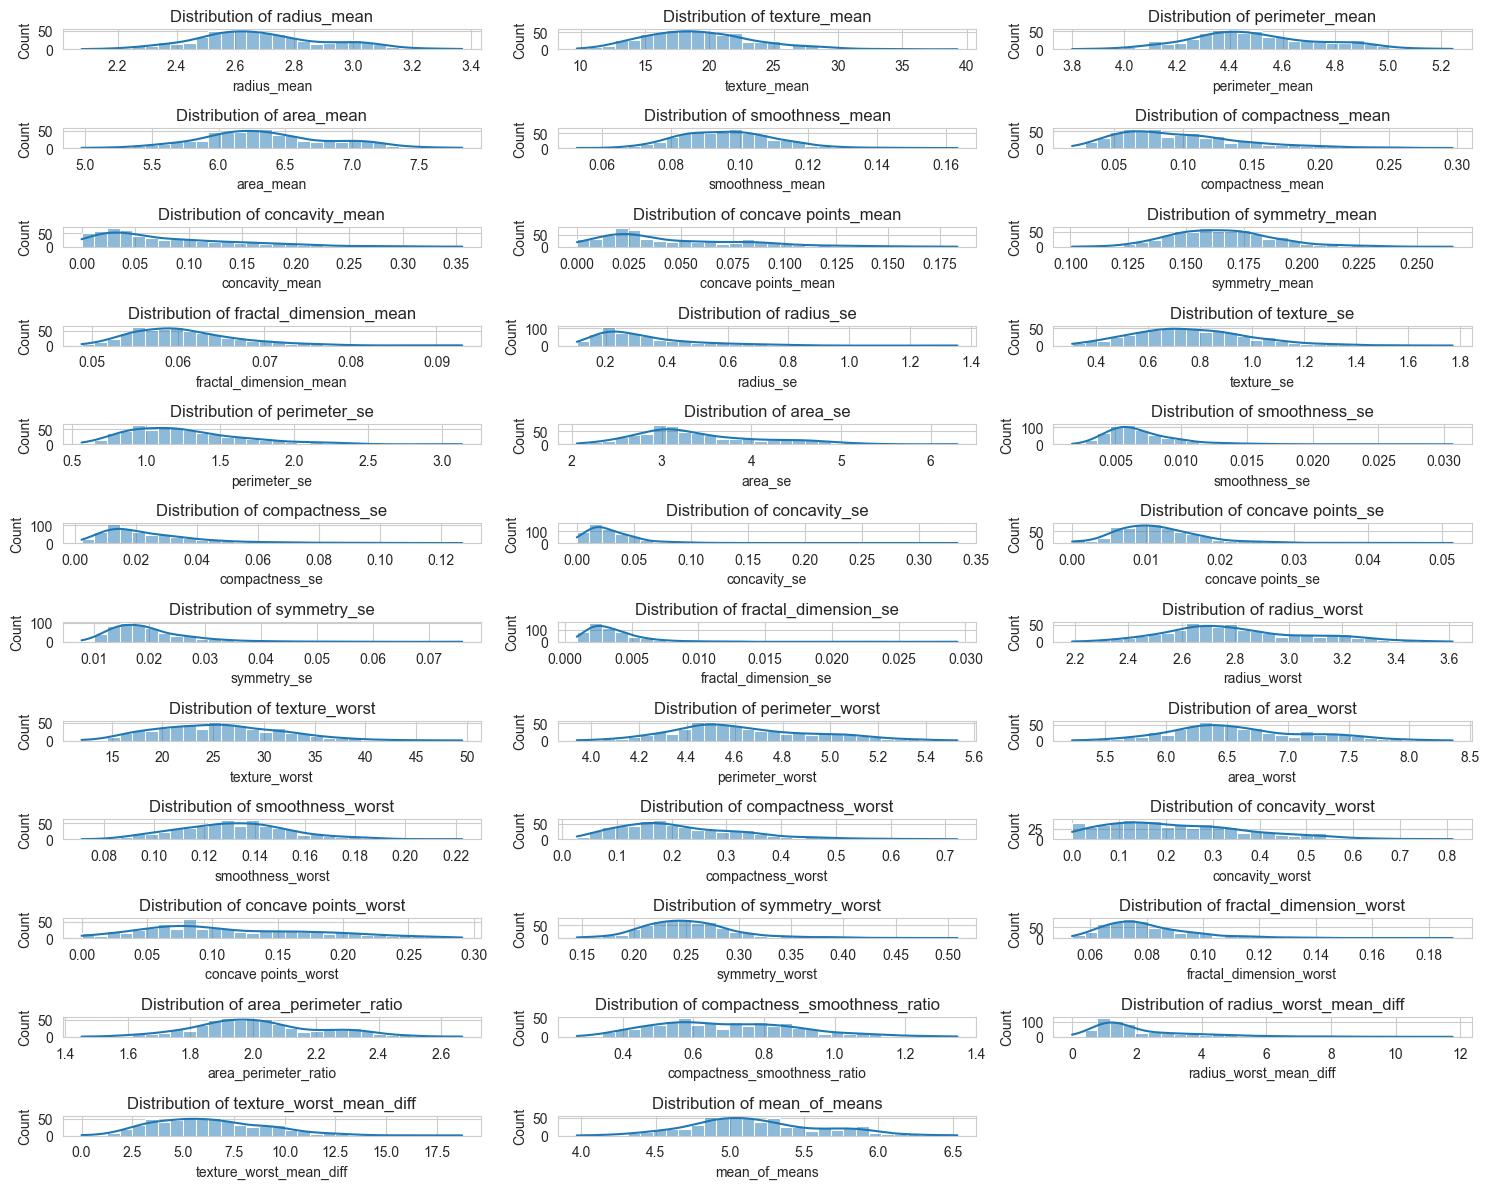

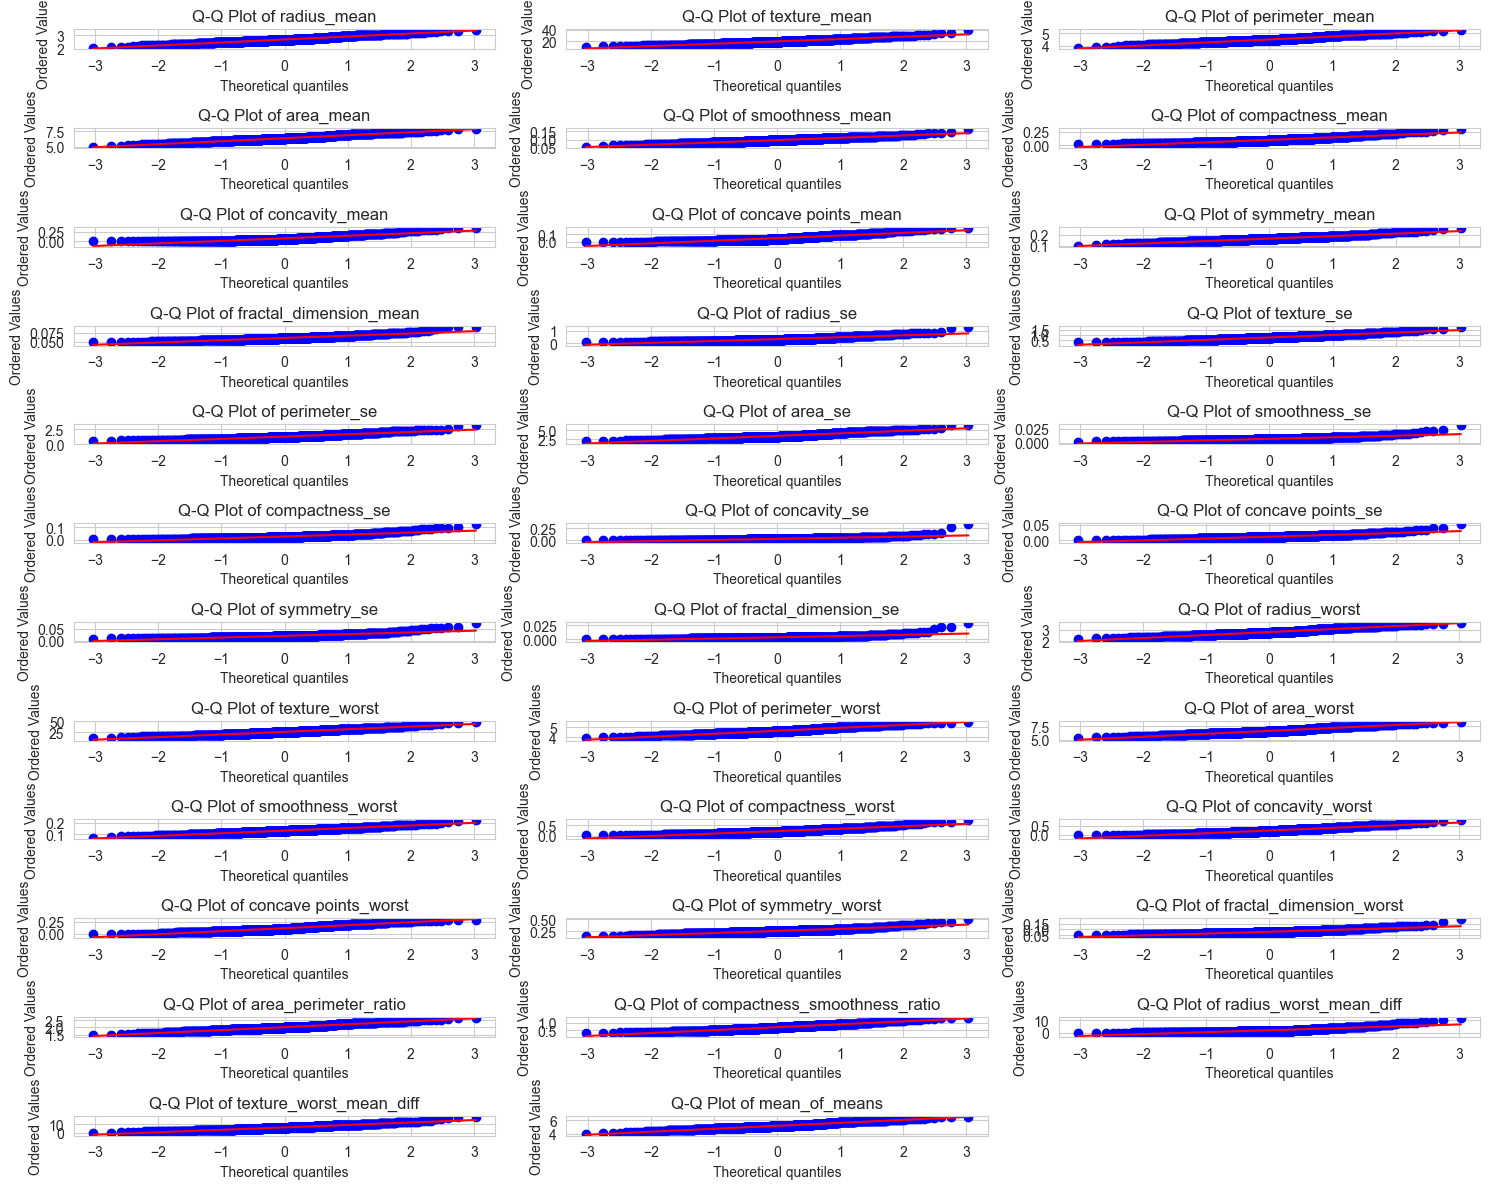

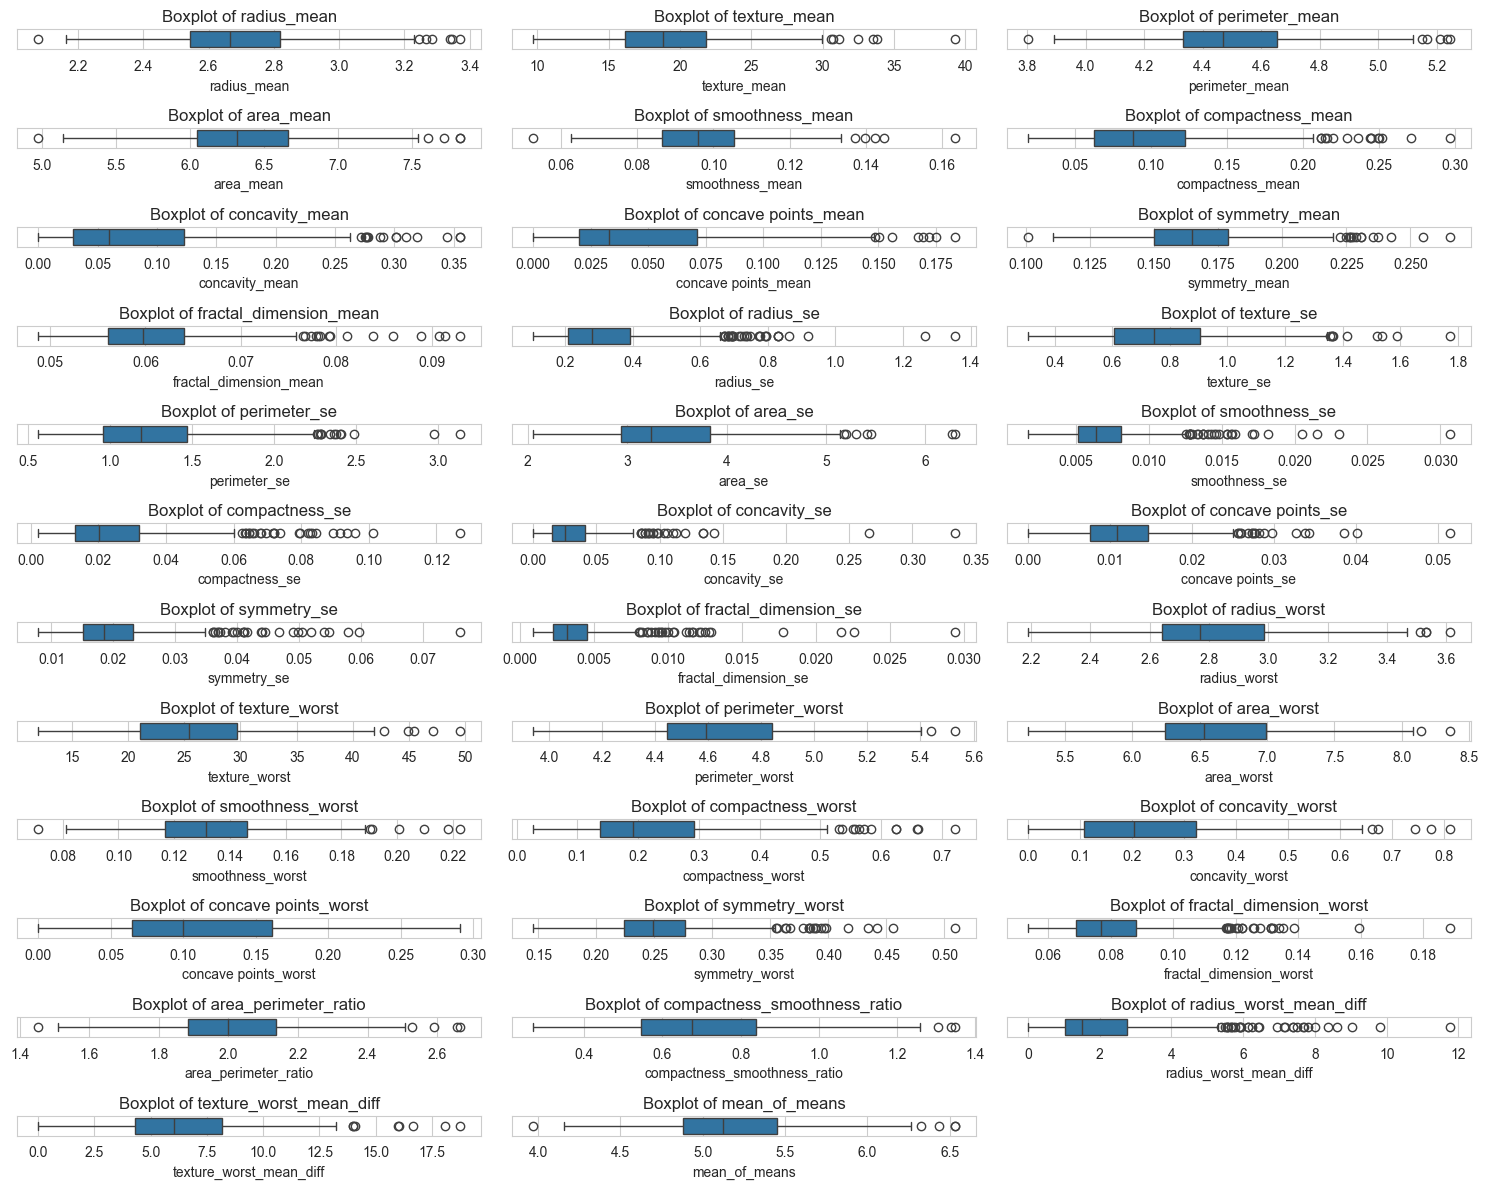

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# List of numerical columns (excluding the target)
num_cols = dataset.columns[1:]  # Skip the first column (diagnosis)

# Function to calculate the number of rows and columns for subplots
def calculate_subplot_layout(num_features, max_cols=3):
    rows = (num_features // max_cols) + (num_features % max_cols > 0)
    return rows, max_cols

# Calculate the number of rows and columns
rows, cols = calculate_subplot_layout(len(num_cols))

# Plot histograms for each numerical feature
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)  # Dynamically adjust subplot layout
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Q-Q Plots to check for normality
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)  # Dynamically adjust subplot layout
    stats.probplot(dataset[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

# Box plots to detect extreme values
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)  # Dynamically adjust subplot layout
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## 4. Categorical Transformation

In [109]:
target=["diagnosis"]
encoder = LabelEncoder()
dataset_treated["diagnosis"] = encoder.fit_transform(dataset_treated["diagnosis"])  
dataset_treated

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  compactness_worst  concavity_worst  \
0           0.2419  ...            0.66560           0.7119   
1           0.1812  ...            0.18660           0.2416   
2           0.2069  ...            0.42450           0.4504   
3           0.2597  ...            0.86630           0.6869   
4           0.1809  ...            0.20500           0.4000   
..             ...  ...                ...              ...   
564         0.1726  ...            0.21130           0.4107   
565         0.1752  ...            0.19220           0.3215   
566         0.1590  ...            0.30940           0.3403   
567         0.2397  ...            0.86810           0.9387   
568         0.1587  ...            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                  0.2654          0.4601                  0.11890   
1                  0.1860          0.2750                  0.08902   
2                  0.2430          0.3613                  0.08758   
3                  0.2575          0.6638                  0.17300   
4                  0.1625          0.2364                  0.07678   
..                    ...             ...                      ...   
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06637   
566                0.1418          0.2218                  0.07820   
567                0.2650          0.4087                  0.12400   
568                0.0000          0.2871                  0.07039   

     area_perimeter_ratio  compactness_smoothness_ratio  \
0                8.151466                      2.344595   
1                9.977427                      0.928015   
2                9.253846                      1.458942   
3                4.976798                      1.992281   
4                9.600296                      1.324028   
..                    ...                           ...   
564             10.415493                      1.044144   
565              9.611280                      1.057260   
566              7.923361                      1.209935   
567

diagnosis                       1.000000
concave points_worst            0.793566
perimeter_worst                 0.782914
concave points_mean             0.776614
radius_worst                    0.776454
perimeter_mean                  0.742636
area_worst                      0.733825
radius_mean                     0.730029
area_perimeter_ratio            0.715978
mean_of_means                   0.714041
radius_worst_mean_diff          0.711434
area_mean                       0.708984
concavity_mean                  0.696360
concavity_worst                 0.659610
compactness_mean                0.596534
compactness_worst               0.590998
compactness_smoothness_ratio    0.584844
radius_se                       0.567134
perimeter_se                    0.556141
area_se                         0.548236
texture_worst                   0.456903
smoothness_worst                0.421465
symmetry_worst                  0.416294
texture_mean                    0.415185
concave points_s

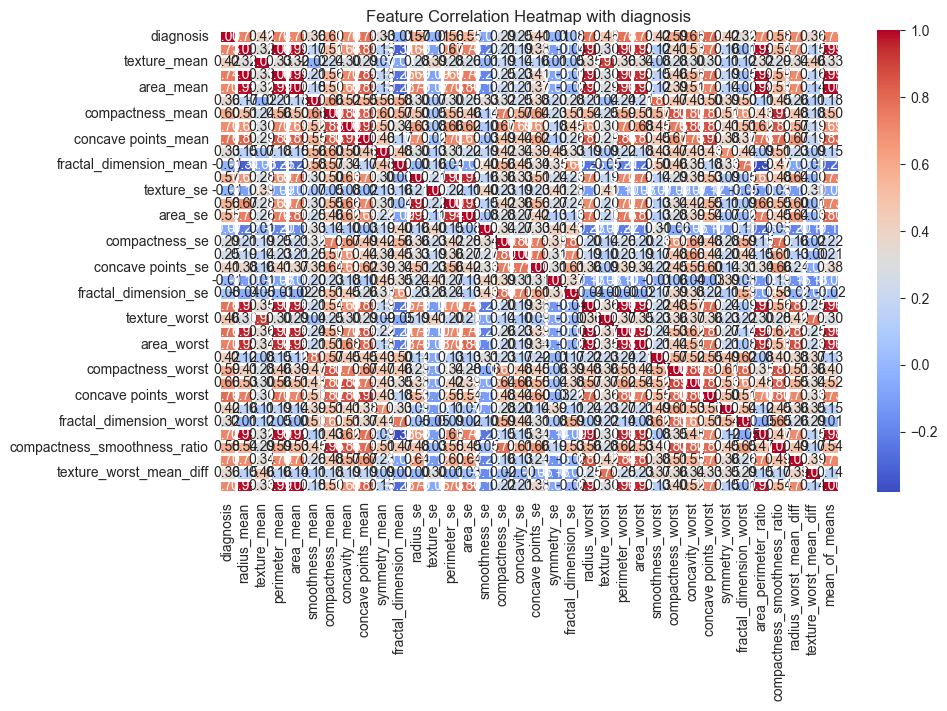

In [112]:

corr_matrix = dataset_treated.corr()

corr_with_target = corr_matrix["diagnosis"].sort_values(ascending=False)

print(corr_with_target)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=1)
plt.title("Feature Correlation Heatmap with diagnosis")
plt.show()



### B) Model Preparation

In [114]:

# Define Features (Exclude target column)
X = dataset_treated.drop(columns=target)  # Replace "booking status" with the actual column name

# Define Target
y = dataset_treated[target]  # Ensure it's the correct target column




In [115]:

mi_scores = mutual_info_classif(X, y)  # Compute MI scores
feature_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("Feature Importance (Mutual Information):")
print(feature_scores)

# Mutual information measures how much information a feature contributes to the target variable.


Feature Importance (Mutual Information):
perimeter_worst                 0.475131
area_worst                      0.462819
radius_worst                    0.455883
concave points_mean             0.442455
concave points_worst            0.437734
radius_worst_mean_diff          0.406974
perimeter_mean                  0.401641
mean_of_means                   0.385665
concavity_mean                  0.375187
radius_mean                     0.366690
area_mean                       0.361464
area_se                         0.342458
area_perimeter_ratio            0.332837
concavity_worst                 0.315402
perimeter_se                    0.272387
radius_se                       0.248822
compactness_worst               0.226385
compactness_smoothness_ratio    0.215212
compactness_mean                0.210093
concave points_se               0.127871
texture_worst                   0.121478
concavity_se                    0.117410
smoothness_worst                0.103922
texture_mean    

##### B.2) Use Recursive Feature Elimination (RFE)

In [116]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Compute mutual information scores
selector = SelectKBest(score_func=mutual_info_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# RFE selects the most important features by training KNN iteratively and eliminating the least important ones

Selected Features: Index(['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


## 5. Train Test Split

In [131]:
# Define independent variables (features) with updated selection
X = dataset_treated[[
    "perimeter_worst", "area_worst", "radius_worst", 
    "concave points_mean", "concave points_worst", "radius_worst_mean_diff", 
    "perimeter_mean"
]]

# Define dependent variable (target)
y = dataset_treated[target]


In [132]:
from sklearn.decomposition import PCA  # Import PCA class

# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform

# Step 3: Apply PCA (Keep enough components to explain 95% of variance)
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 4: Apply SMOTE to balance the classes in training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)


## 6.Modeling & Accuaracy

### A. KNN

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



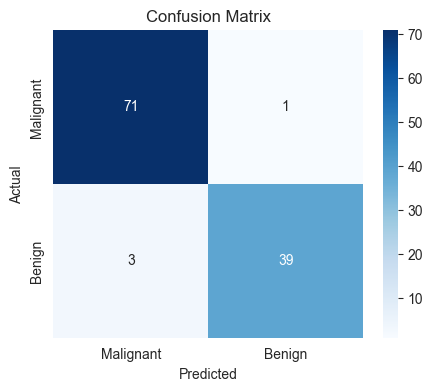

Cross-Validation Accuracy Scores: [0.92982456 0.92105263 0.94736842 0.96491228 0.97368421]
Mean Accuracy: 0.9474
Standard Deviation: 0.0200
Number of PCA Components Retained: 3
Explained Variance Ratio: 0.9867


In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


# Step 5: Train the KNN model using the resampled dataset
knn = KNeighborsClassifier(n_neighbors=15)  # You can tune 'n_neighbors'
knn.fit(X_train_resampled, y_train_resampled)

# Step 6: Make predictions on the test set
y_pred = knn.predict(X_test_pca)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels= ["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 9: Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print Cross-Validation Results
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

# Step 10: Display Number of PCA Components Retained
print(f"Number of PCA Components Retained: {X_train_pca.shape[1]}")
print(f"Explained Variance Ratio: {np.sum(pca.explained_variance_ratio_):.4f}")


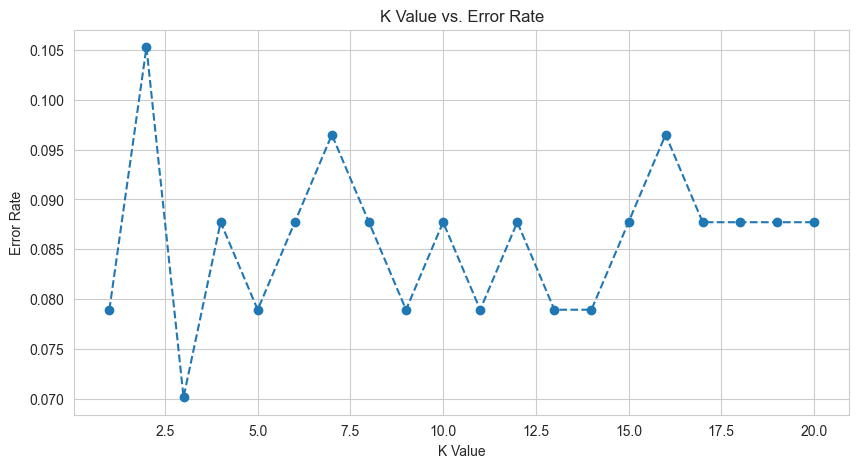

In [138]:
import matplotlib.pyplot as plt
error_rates = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='dashed')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("K Value vs. Error Rate")
plt.show()


### B. Logistic Regression

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



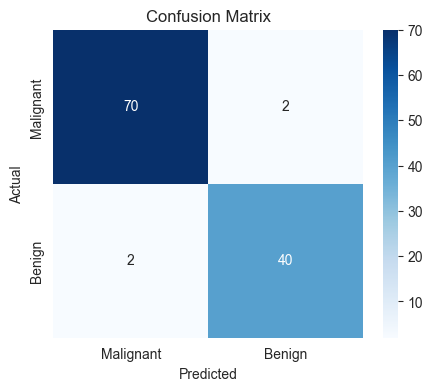

Cross-Validation Accuracy Scores: [0.93859649 0.94736842 0.94736842 0.95614035 0.98245614]
Mean Accuracy: 0.9544
Standard Deviation: 0.0151


In [139]:

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform

# Step 4: Apply SMOTE to balance the classes in training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 5: Train the Logistic Regression model using the resampled dataset
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Step 6: Make predictions on test set
y_pred = log_reg.predict(X_test_scaled)

# Step 7: Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Step 8: Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 9: Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print Cross-Validation Results
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


### C. Random Forest

🔹 Model Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



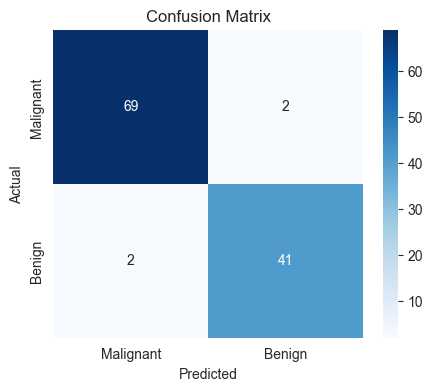

Stratified Cross-Validation Scores: [0.96491228 0.9122807  0.92982456 0.96491228 0.96460177]
Mean Accuracy: 0.9473


In [140]:
import pickle
# Encode the categorical target variable
le = LabelEncoder()
y = le.fit_transform(y)


# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(X_train, y_train)

# Make predictions
y_pred = RFC.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Model Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Stratified K-Fold preserves class distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(RFC, X, y, cv=skf, scoring='accuracy')

print(f"Stratified Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

